# Masterthesis
#### Julian Jetz

In [1]:
import glob
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from pandas.plotting import scatter_matrix
from currency_converter import CurrencyConverter
from datetime import date


In [2]:
na_values = ['nan', 'N/A', 'NaN', 'NaT']

In [3]:
df = pd.read_csv('resources/accident_data.csv', sep=";", na_values=na_values, index_col=False, dtype = {"STATE" : "str", "TYPE" : "str", "TYPEQ" : "str", "TYPTRK" : "str", "WEATHER" : "str", "VISIBLTY" : "str", "TONS" : "float64"})
df.shape[0]

37388

In [4]:
pd.set_option('display.max_colwidth', 500)

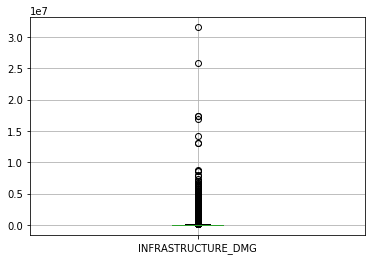

In [5]:
df.boxplot(column=['INFRASTRUCTURE_DMG'])

In [6]:
std_dev = 2
df = df[(np.abs(stats.zscore(df[['LOCOMOTIVES1','LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2','LOADF2', 'EMPTYF2', 'INFRASTRUCTURE_DMG']])) < float(std_dev)).all(axis=1)]
df.shape[0]

27067

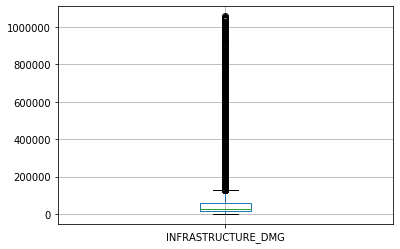

In [7]:
df.boxplot(column=['INFRASTRUCTURE_DMG'])

In [8]:
x_data = df[['YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'ACCIDENT_TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']]
y = df['INFRASTRUCTURE_DMG']

Text(0.5, 0, 'Zugart')

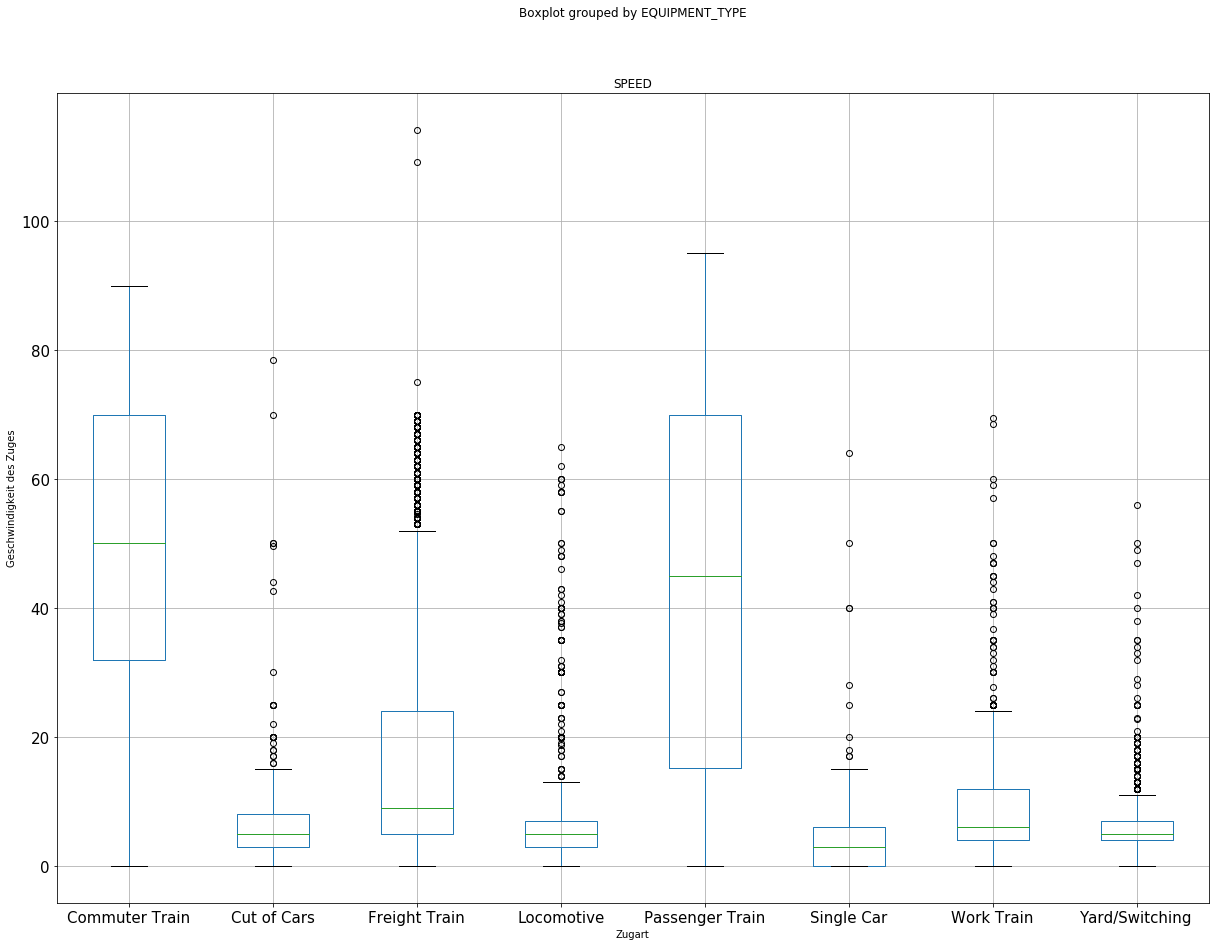

In [9]:
ax = df.boxplot(column=['SPEED'], by='EQUIPMENT_TYPE', figsize=(20,15), fontsize=15)
ax.set_ylabel("Geschwindigkeit des Zuges")
ax.set_xlabel("Zugart")

Text(0.5, 0, 'Zugart')

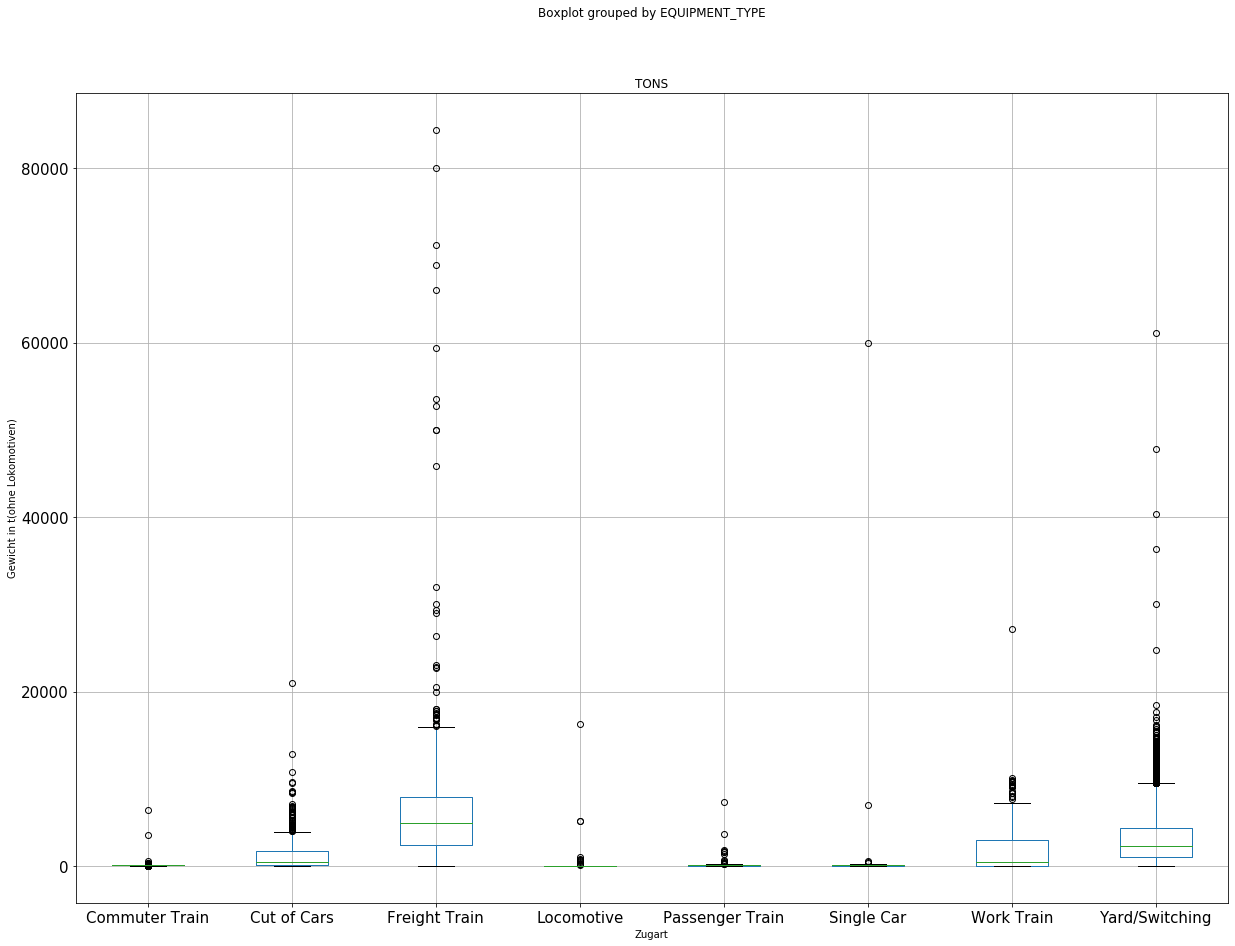

In [10]:
ax = df.boxplot(column=['TONS'], by='EQUIPMENT_TYPE', figsize=(20,15), fontsize=15)
ax.set_ylabel("Gewicht in t(ohne Lokomotiven)")
ax.set_xlabel("Zugart")

Text(0.5, 0, 'Zugart')

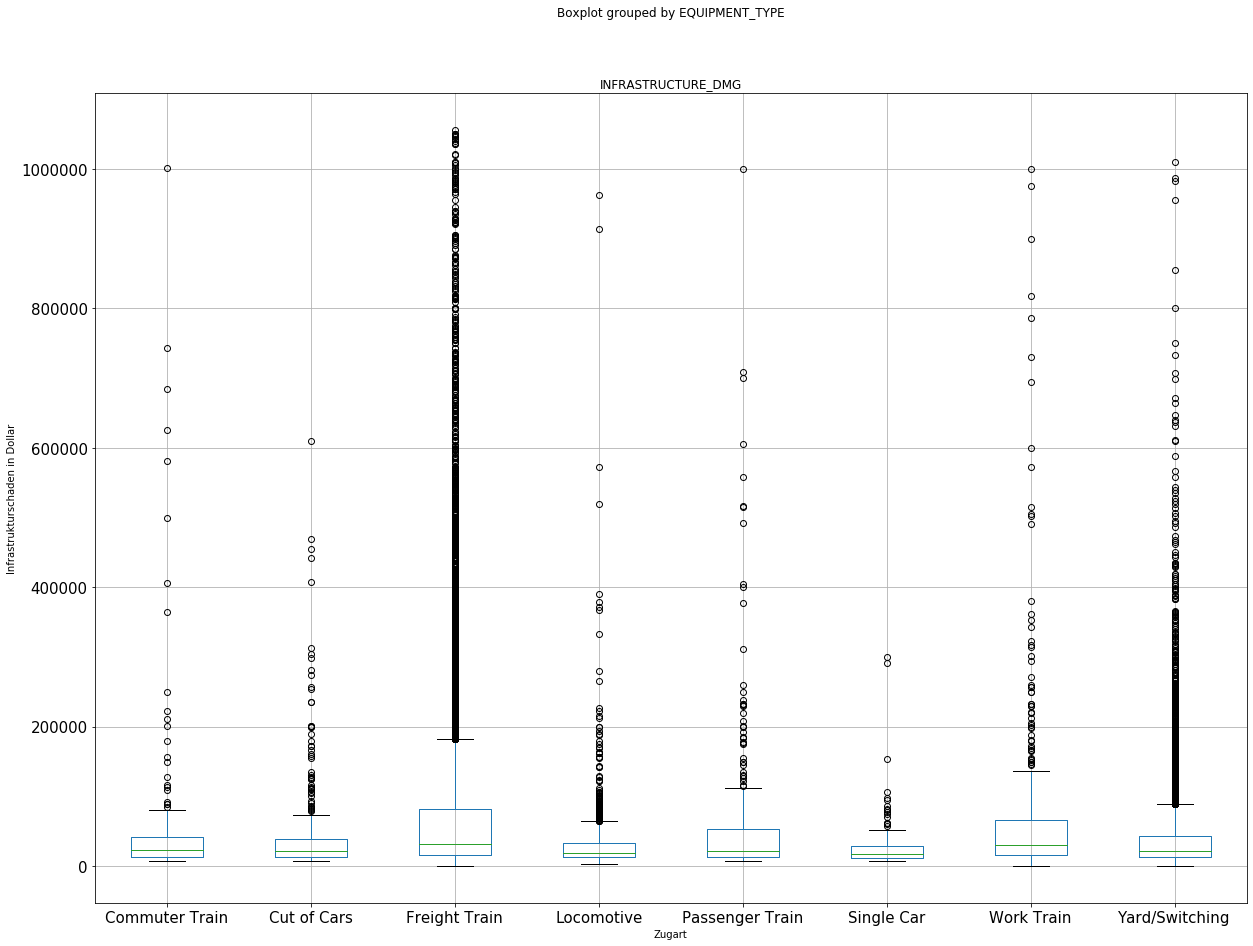

In [11]:
ax = df.boxplot(column=['INFRASTRUCTURE_DMG'], by='EQUIPMENT_TYPE', figsize=(20,15), fontsize=15)
ax.set_ylabel("Infrastrukturschaden in Dollar")
ax.set_xlabel("Zugart")

Text(0.5, 0, 'Unfallschwere')

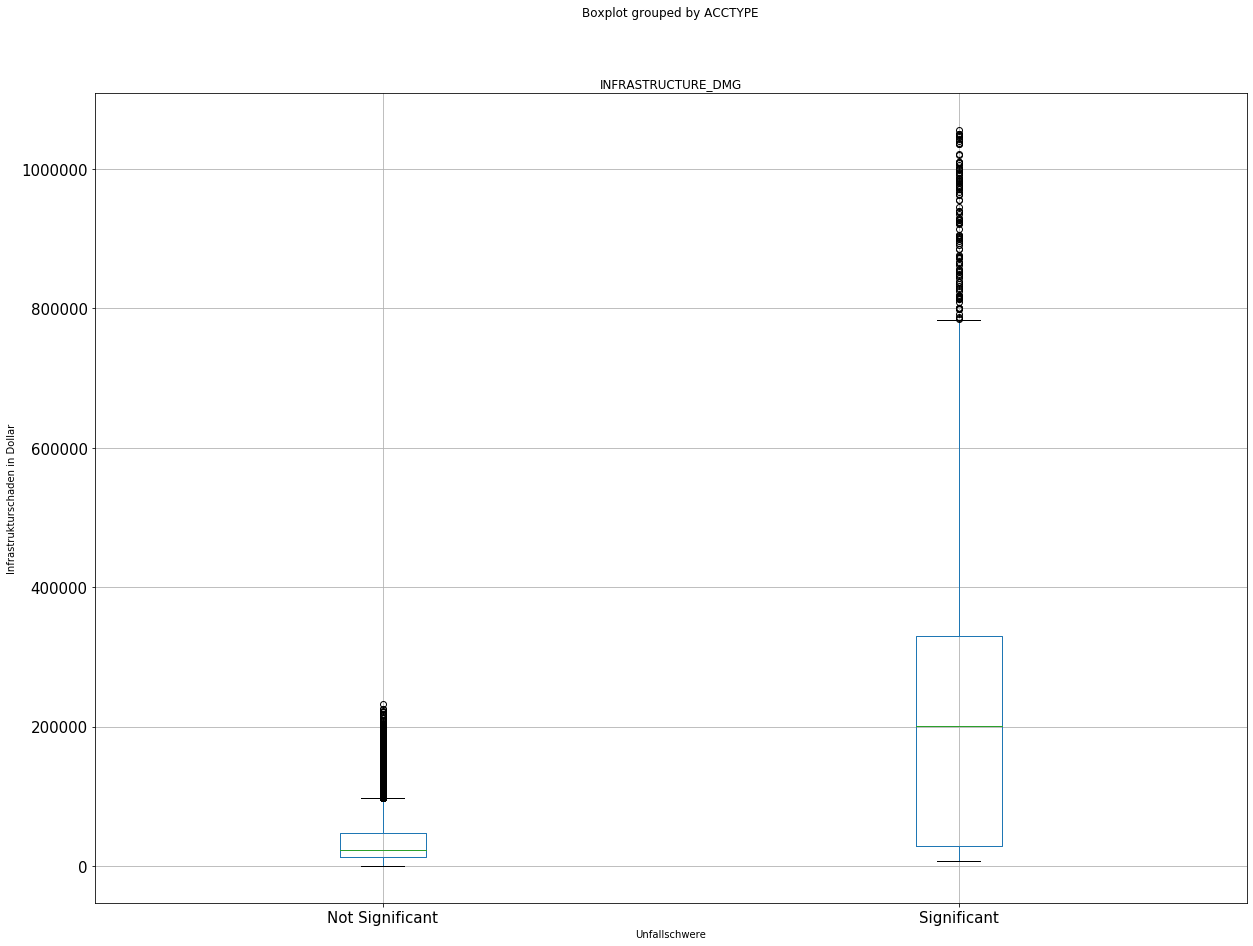

In [12]:
ax = df.boxplot(column=['INFRASTRUCTURE_DMG'], by='ACCTYPE', figsize=(20,15), fontsize=15)
ax.set_ylabel("Infrastrukturschaden in Dollar")
ax.set_xlabel("Unfallschwere")

Text(0.5, 0, 'Wetter')

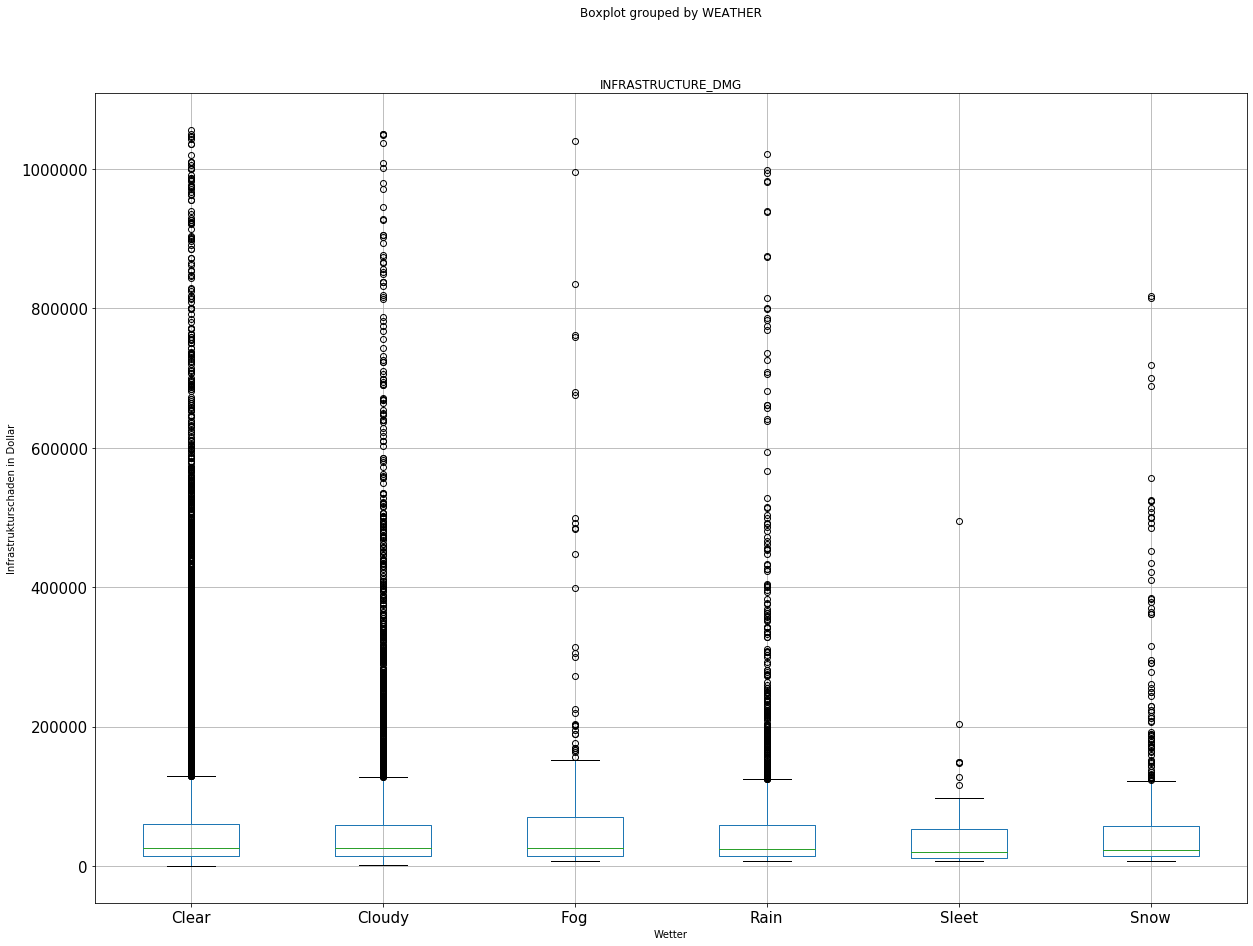

In [13]:
ax = df.boxplot(column=['INFRASTRUCTURE_DMG'], by='WEATHER', figsize=(20,15), fontsize=15)
ax.set_ylabel("Infrastrukturschaden in Dollar")
ax.set_xlabel("Wetter")

Text(0.5, 0, 'Zug zu schnell?')

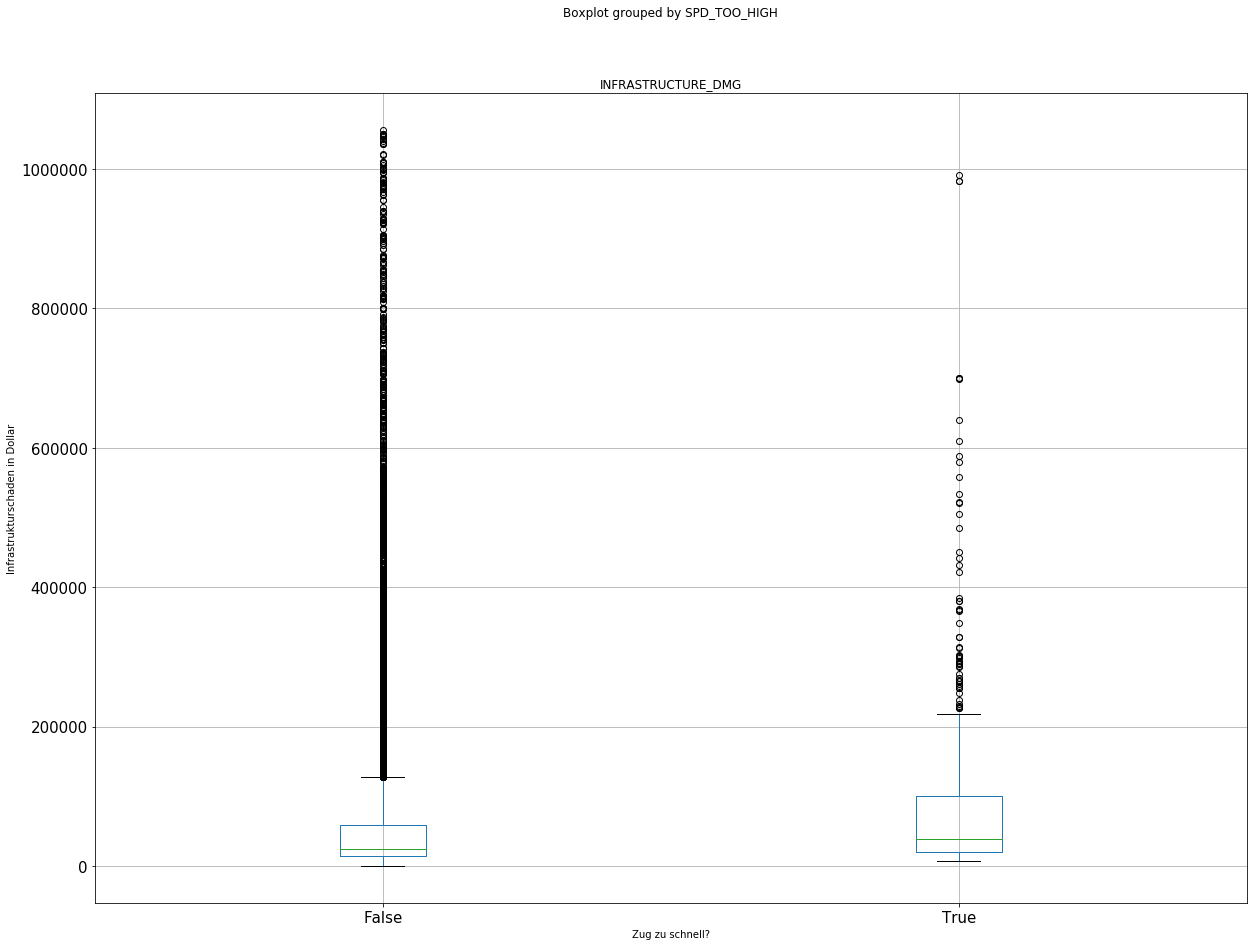

In [14]:
ax = df.boxplot(column=['INFRASTRUCTURE_DMG'], by='SPD_TOO_HIGH', figsize=(20,15), fontsize=15)
ax.set_ylabel("Infrastrukturschaden in Dollar")
ax.set_xlabel("Zug zu schnell?")

Text(0.5, 0, 'Jahreszeit')

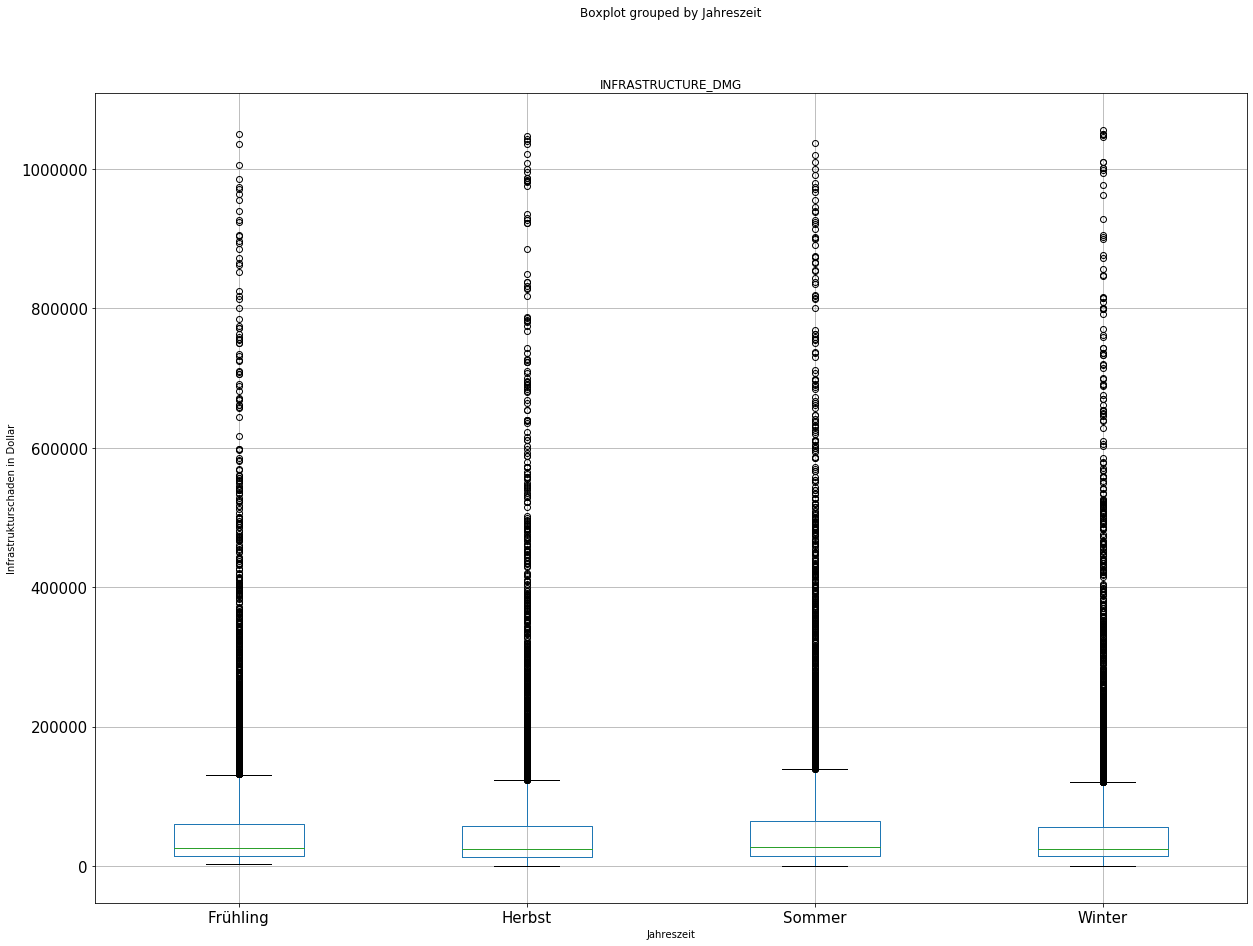

In [15]:
ax = df.boxplot(column=['INFRASTRUCTURE_DMG'], by='Jahreszeit', figsize=(20,15), fontsize=15)
ax.set_ylabel("Infrastrukturschaden in Dollar")
ax.set_xlabel("Jahreszeit")

Text(0.5, 0, 'Unfallart')

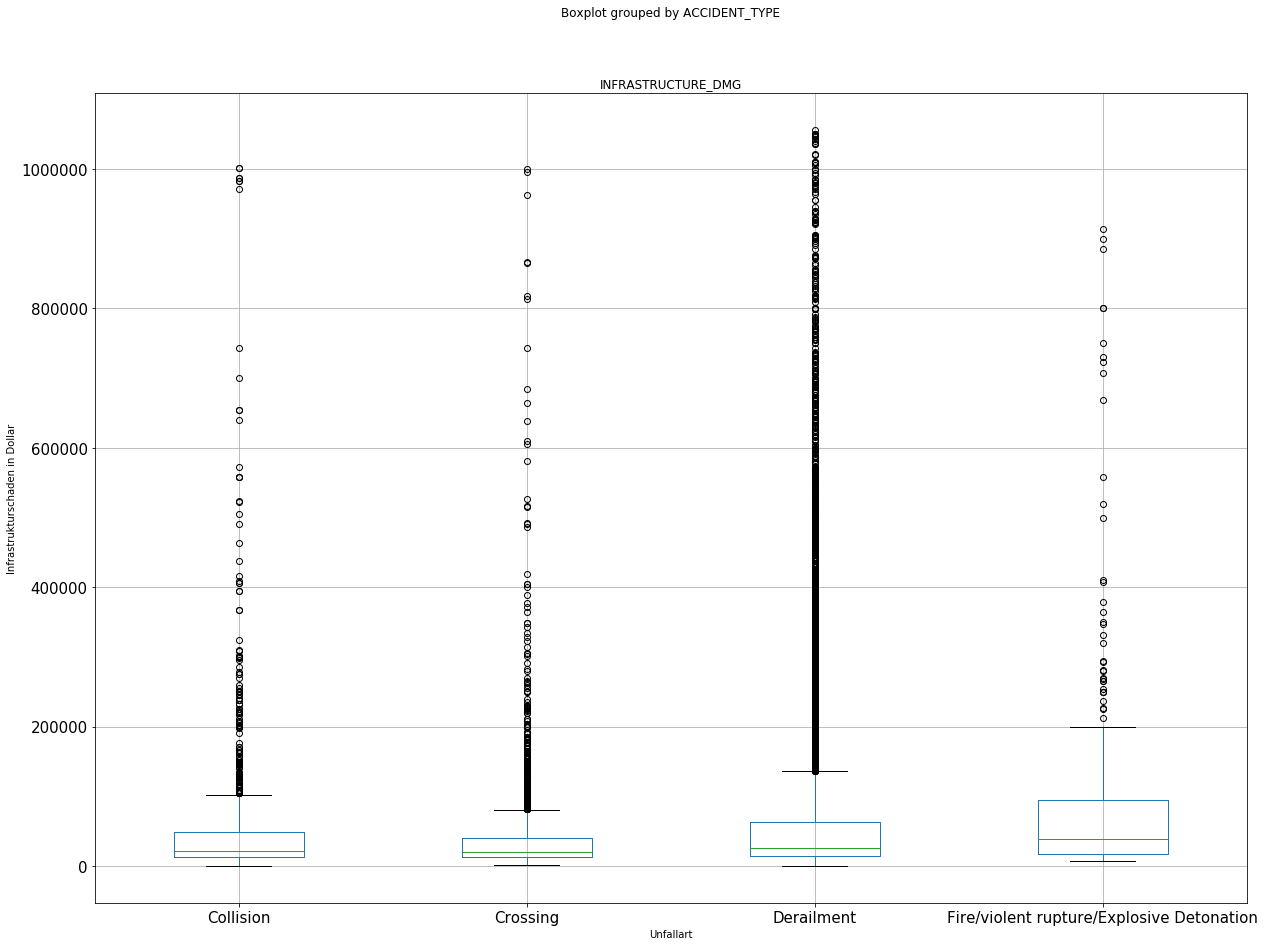

In [16]:
ax = df.boxplot(column=['INFRASTRUCTURE_DMG'], by='ACCIDENT_TYPE', figsize=(20,15), fontsize=15)
ax.set_ylabel("Infrastrukturschaden in Dollar")
ax.set_xlabel("Unfallart")

Text(0.5, 0, 'Unfallursache')

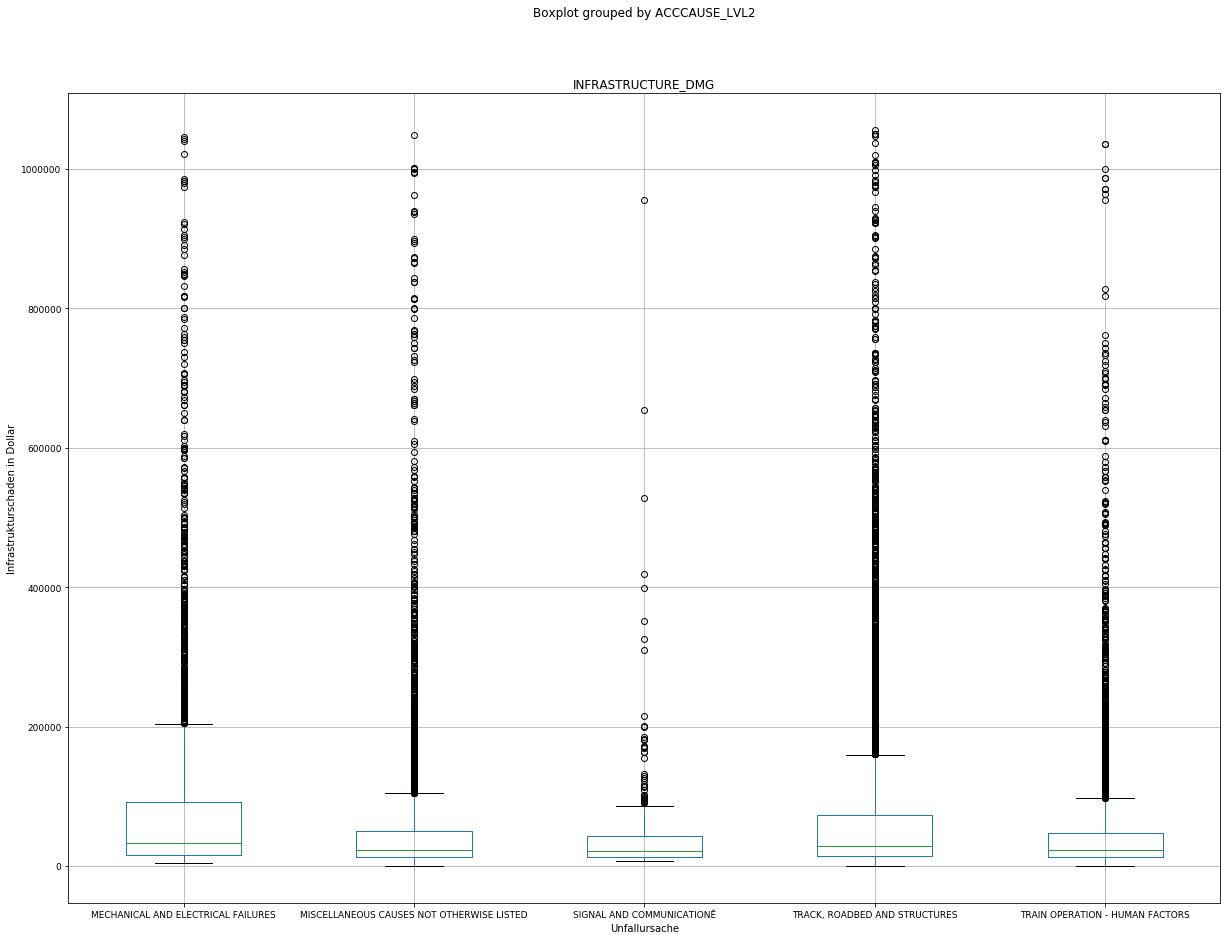

In [17]:
ax = df.boxplot(column=['INFRASTRUCTURE_DMG'], by='ACCCAUSE_LVL2', figsize=(20,15), fontsize=9)
ax.set_ylabel("Infrastrukturschaden in Dollar")
ax.set_xlabel("Unfallursache")

In [18]:
x_data.describe(include=np.number, percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,YEAR4,MONTH,LOCOMOTIVES1,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOCOMOTIVES2,LOADF2,EMPTYF2,TONS,SPEED
count,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000,27067.000000
mean,2008.179333,6.424059,2.190084,31.731481,0.052352,13.564931,0.008645,0.091070,2.304245,0.809066,4160.667834,12.209126
std,5.639446,3.431249,1.046453,29.440530,0.426823,18.713574,0.120649,0.287714,2.661356,1.479874,3922.351704,14.397352
min,2000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,2001.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,146.275417,3.000000
20%,2003.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.393855,4.000000
30%,2004.000000,4.000000,2.000000,9.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,5.000000
40%,2006.000000,5.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2295.000000,5.000000
50%,2007.000000,6.000000,2.000000,24.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,3192.000000,7.000000
60%,2009.000000,8.000000,2.000000,33.000000,0.000000,9.000000,0.000000,0.000000,2.000000,0.000000,4249.521577,8.000000


In [19]:
x_data.describe(include=np.object, percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,TEMP_CLUSTER,ACCCAUSE_LVL1,ACCIDENT_TYPE,EQUIPMENT_TYPE,TYPTRK,VISIBLTY,WEATHER,STATE,ACCTYPE,Jahreszeit
count,27067,27067,27067,27067,27067,27067,27067,27067,27067,27067
unique,4,31,4,8,4,4,6,50,2,4
top,Moderat,Track Geometry,Derailment,Freight Train,Yard,Day,Clear,48,Not Significant,Sommer
freq,12463,4105,22835,14362,14033,13516,18123,3587,23504,7261


In [20]:
y.describe(include='all', percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    2.706700e+04
mean     6.301960e+04
std      1.095170e+05
min      1.240000e+02
10%      9.999200e+03
20%      1.247000e+04
30%      1.550000e+04
40%      1.968800e+04
50%      2.534500e+04
60%      3.403940e+04
70%      4.867320e+04
80%      7.658680e+04
90%      1.467234e+05
max      1.056630e+06
Name: INFRASTRUCTURE_DMG, dtype: float64

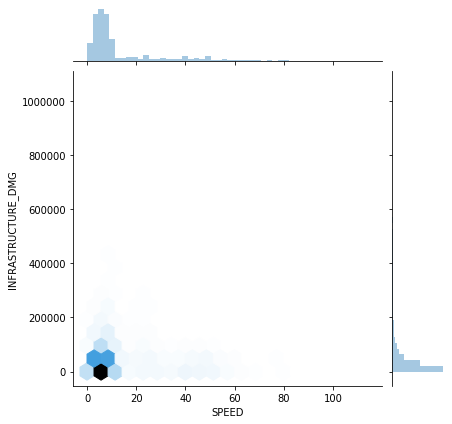

In [21]:
ax = sns.jointplot(x='SPEED', y='INFRASTRUCTURE_DMG', data=df, kind='hex', gridsize=20)

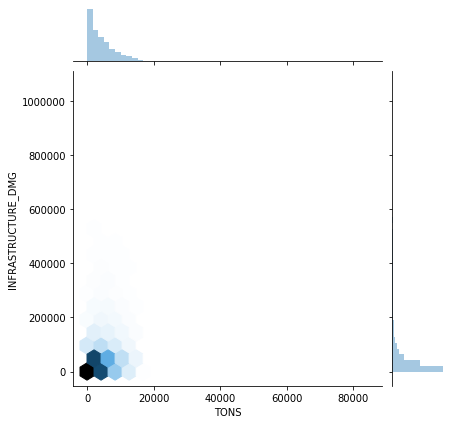

In [22]:
ax = sns.jointplot(x='TONS', y='INFRASTRUCTURE_DMG', data=df, kind='hex', gridsize=20)

#### Scattermatrix und Korrelationen der Daten
Jahr, Monat, Anzahl der beladenen Frachtwagons und Personenwagons, Gewicht, Temperatur, Geschwindigkeit und Unfallkosten

In [23]:
#scatter_matrix(df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'ACCIDENT_TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']], diagonal='kde', figsize=(18, 18))
#plt.savefig(r"Images/scatterALL.png")

In [24]:
colormap = plt.cm.RdBu
corr = df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']].corr()
corr

,INFRASTRUCTURE_DMG,EQPDMG,TRKDMG,YEAR4,MONTH,LOCOMOTIVES1,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOCOMOTIVES2,LOADF2,EMPTYF2,TONS,SPEED,SPD_TOO_HIGH
INFRASTRUCTURE_DMG,1.000000,0.782504,0.721018,0.078871,0.002885,0.140729,0.221416,-0.000763,0.035180,-0.012915,-0.039557,0.313567,0.050301,0.214873,0.157895,0.034651
EQPDMG,0.782504,1.000000,0.228815,0.081338,0.007803,0.085219,0.163921,0.032688,0.003294,0.001263,-0.018025,0.294614,0.065703,0.158131,0.127809,0.040128
TRKDMG,0.721018,0.228815,1.000000,0.036485,-0.003776,0.133691,0.175063,-0.040345,0.054054,-0.023650,-0.043524,0.202771,0.021700,0.168983,0.118081,0.003508
YEAR4,0.078871,0.081338,0.036485,1.000000,-0.035729,-0.017553,-0.014468,0.019170,-0.009520,0.018519,0.078399,-0.090480,-0.010781,-0.000478,0.000281,-0.016828
MONTH,0.002885,0.007803,-0.003776,-0.035729,1.000000,0.018441,0.019294,-0.009407,0.012507,0.014438,-0.004839,-0.005038,0.005577,0.014233,0.013926,0.010772
LOCOMOTIVES1,0.140729,0.085219,0.133691,-0.017553,0.018441,1.000000,0.429155,-0.125266,0.166720,-0.079446,-0.022034,0.157070,0.010076,0.397187,0.142777,-0.019111
LOADF1,0.221416,0.163921,0.175063,-0.014468,0.019294,0.429155,1.000000,-0.132165,0.021805,-0.074707,-0.185457,0.370288,-0.123717,0.845487,0.150208,-0.011858
LOADP1,-0.000763,0.032688,-0.040345,0.019170,-0.009407,-0.125266,-0.132165,1.000000,-0.088903,0.060806,-0.006633,-0.106102,-0.066942,-0.126889,0.349583,-0.009620
EMPTYF1,0.035180,0.003294,0.054054,-0.009520,0.012507,0.166720,0.021805,-0.088903,1.000000,-0.051338,-0.132724,-0.145860,0.411702,0.185880,0.047065,-0.028661
EMPTYP1,-0.012915,0.001263,-0.023650,0.018519,0.014438,-0.079446,-0.074707,0.060806,-0.051338,1.000000,0.052888,-0.058936,-0.037521,-0.072662,0.002447,-0.008411


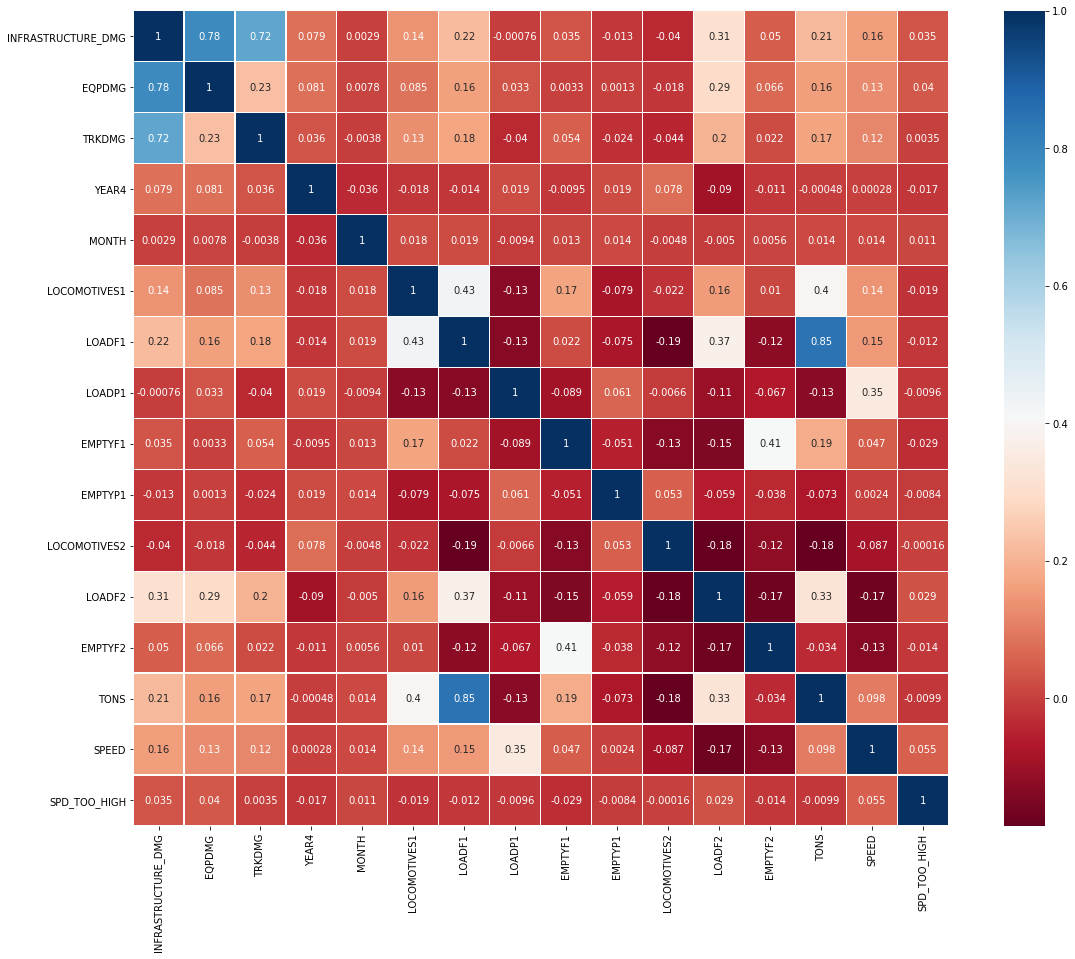

In [25]:
ax=plt.figure(figsize=(20,15)).gca()
ax=sns.heatmap(corr,ax=ax,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(r"Images/corrALL.png")

In [26]:
corr = df[df['TONS']!=0][['TONS', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1', 'LOADF2', 'EMPTYF2']].corr()
corr

,TONS,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOADF2,EMPTYF2
TONS,1.000000,0.836302,-0.137172,0.154396,-0.073450,0.295719,-0.065185
LOADF1,0.836302,1.000000,-0.142843,-0.017278,-0.075628,0.340457,-0.158371
LOADP1,-0.137172,-0.142843,1.000000,-0.094531,0.062779,-0.113467,-0.070783
EMPTYF1,0.154396,-0.017278,-0.094531,1.000000,-0.051178,-0.182393,0.400350
EMPTYP1,-0.073450,-0.075628,0.062779,-0.051178,1.000000,-0.058986,-0.037142
LOADF2,0.295719,0.340457,-0.113467,-0.182393,-0.058986,1.000000,-0.195910
EMPTYF2,-0.065185,-0.158371,-0.070783,0.400350,-0.037142,-0.195910,1.000000


In [27]:
df.loc[(df['EQUIPMENT_TYPE']!='Locomotive')&(df['TONS']==0), 'TONS'] = np.NaN

In [28]:
anova_df =df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'TEMP_CLUSTER', 'ACCCAUSE_LVL1', 'ACCCAUSE_LVL2', 'ACCIDENT_TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']]

In [29]:
anova = anova_df.copy()
anova = anova.dropna

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
def anova(cat):
    print ("ANOVA für INFRASTRUCUTURE_DMG ~ %s :" % (cat))
    mod= ols('INFRASTRUCTURE_DMG ~ ' + cat , data=anova_df).fit()
    anova_table = sm.stats.anova_lm(mod, typ=2)
    esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
    anova_table['EtaSq'] = [esq_sm, 'NaN']
    anova_table
    pair_t = mod.t_test_pairwise(cat)
    return [anova_table, pair_t.result_frame]


#### ANOVA Korrelation Temperatur Cluster und Damage

In [32]:
temp_cluster = anova("TEMP_CLUSTER")

ANOVA für INFRASTRUCUTURE_DMG ~ TEMP_CLUSTER :


In [33]:
temp_cluster[0]

,sum_sq,df,F,PR(>F),EtaSq
TEMP_CLUSTER,3.353213e+11,3.0,9.327766,0.000004,0.00103294
Residual,3.242934e+14,27063.0,NaN,NaN,NaN


In [34]:
temp_cluster[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Kalt-Heiß,-6772.886305,3119.179896,-2.171368,0.029912,-12886.639994,-659.132616,0.058929,False
Moderat-Heiß,-12206.154231,2661.099803,-4.586883,0.000005,-17422.047281,-6990.261182,0.000024,True
Warm-Heiß,-12547.299130,2721.188364,-4.610963,0.000004,-17880.968861,-7213.629400,0.000024,True
Moderat-Kalt,-5433.267926,2137.940206,-2.541356,0.011048,-9623.741145,-1242.794708,0.035731,True
Warm-Kalt,-5774.412825,2212.284401,-2.610158,0.009055,-10110.604506,-1438.221145,0.035731,True
Warm-Moderat,-341.144899,1498.789915,-0.227614,0.819948,-3278.850538,2596.560740,0.819948,False


#### ANOVA Korrelation Unfallursachen Cluster und Damage

In [35]:
cause = anova("ACCCAUSE_LVL2")

ANOVA für INFRASTRUCUTURE_DMG ~ ACCCAUSE_LVL2 :


In [36]:
cause[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCCAUSE_LVL2,5.437047e+12,4.0,115.242146,1.265108e-97,0.0167485
Residual,3.191917e+14,27062.0,NaN,NaN,NaN


In [37]:
cause[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
MISCELLANEOUS CAUSES NOT OTHERWISE LISTED-MECHANICAL AND ELECTRICAL FAILURES,-35691.045110,2421.780836,-14.737521,5.732389e-49,-40437.860631,-30944.229589,0.000000e+00,True
SIGNAL AND COMMUNICATIONÊ-MECHANICAL AND ELECTRICAL FAILURES,-47299.303074,5760.194360,-8.211407,2.282539e-16,-58589.581529,-36009.024620,1.110223e-15,True
"TRACK, ROADBED AND STRUCTURES-MECHANICAL AND ELECTRICAL FAILURES",-19059.027815,2236.406843,-8.522165,1.646228e-17,-23442.500735,-14675.554895,0.000000e+00,True
TRAIN OPERATION - HUMAN FACTORS-MECHANICAL AND ELECTRICAL FAILURES,-43051.872513,2321.064699,-18.548329,2.503595e-76,-47601.279204,-38502.465822,0.000000e+00,True
SIGNAL AND COMMUNICATIONÊ-MISCELLANEOUS CAUSES NOT OTHERWISE LISTED,-11608.257964,5600.529886,-2.072707,3.820899e-02,-22585.585802,-630.930127,7.495806e-02,False
"TRACK, ROADBED AND STRUCTURES-MISCELLANEOUS CAUSES NOT OTHERWISE LISTED",16632.017295,1785.388333,9.315630,1.301531e-20,13132.563949,20131.470641,0.000000e+00,True
TRAIN OPERATION - HUMAN FACTORS-MISCELLANEOUS CAUSES NOT OTHERWISE LISTED,-7360.827403,1890.353742,-3.893889,9.888661e-05,-11066.018372,-3655.636433,2.966305e-04,True
"TRACK, ROADBED AND STRUCTURES-SIGNAL AND COMMUNICATIONÊ",28240.275260,5522.900338,5.113305,3.187260e-07,17415.105344,39065.445175,1.274903e-06,True
TRAIN OPERATION - HUMAN FACTORS-SIGNAL AND COMMUNICATIONÊ,4247.430562,5557.720209,0.764240,4.447311e-01,-6645.988098,15140.849221,4.447311e-01,False
"TRAIN OPERATION - HUMAN FACTORS-TRACK, ROADBED AND STRUCTURES",-23992.844698,1646.186629,-14.574802,6.174986e-48,-27219.455515,-20766.233881,0.000000e+00,True


#### ANOVA Korrelation Unfallart und Damage

In [38]:
accidenttype = anova("ACCIDENT_TYPE")

ANOVA für INFRASTRUCUTURE_DMG ~ ACCIDENT_TYPE :


In [39]:
accidenttype[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCIDENT_TYPE,1.597024e+12,3.0,44.598558,9.672369e-29,0.00491954
Residual,3.230317e+14,27063.0,NaN,NaN,NaN


In [40]:
accidenttype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Crossing-Collision,-12204.261237,3703.179599,-3.295617,9.833210e-04,-19462.684506,-4945.837969,9.833210e-04,True
Derailment-Collision,11070.914937,3083.972610,3.589823,3.314878e-04,5026.169348,17115.660526,6.628658e-04,True
Fire/violent rupture/Explosive Detonation-Collision,35143.316010,6369.116704,5.517769,3.464724e-08,22659.518332,47627.113688,1.385889e-07,True
Derailment-Crossing,23275.176174,2290.871011,10.159968,3.306644e-24,18784.950679,27765.401670,0.000000e+00,True
Fire/violent rupture/Explosive Detonation-Crossing,47347.577247,6025.184688,7.858278,4.038484e-15,35537.904084,59157.250411,1.998401e-14,True
Fire/violent rupture/Explosive Detonation-Derailment,24072.401073,5665.703702,4.248793,2.156438e-05,12967.329208,35177.472938,6.469175e-05,True


#### ANOVA Korrelation Zugart und Damage

In [41]:
eqtype = anova("EQUIPMENT_TYPE")

ANOVA für INFRASTRUCUTURE_DMG ~ EQUIPMENT_TYPE :


In [42]:
eqtype[0]

,sum_sq,df,F,PR(>F),EtaSq
EQUIPMENT_TYPE,1.072424e+13,7.0,132.063464,5.235396e-192,0.0330354
Residual,3.139045e+14,27059.0,NaN,NaN,NaN


In [43]:
eqtype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Cut of Cars-Commuter Train,-21716.984293,9475.230457,-2.291974,2.191477e-02,-40288.925467,-3145.043119,2.163111e-01,False
Freight Train-Commuter Train,18566.859458,8214.540748,2.260243,2.381408e-02,2465.935240,34667.783677,2.163111e-01,False
Locomotive-Commuter Train,-28938.893099,8772.936433,-3.298655,9.727448e-04,-46134.301707,-11743.484492,1.736538e-02,True
Passenger Train-Commuter Train,-6119.021891,9788.694411,-0.625111,5.319034e-01,-25305.368608,13067.324825,9.095311e-01,False
Single Car-Commuter Train,-33799.223011,11937.034615,-2.831459,4.637037e-03,-57196.427508,-10402.018515,7.597206e-02,False
Work Train-Commuter Train,14451.599732,9784.962271,1.476919,1.397089e-01,-4727.431798,33630.631262,6.999709e-01,False
Yard/Switching-Commuter Train,-20850.801126,8236.298352,-2.531574,1.136079e-02,-36994.371373,-4707.230879,1.380307e-01,False
Freight Train-Cut of Cars,40283.843751,4890.479525,8.237197,1.841682e-16,30698.251246,49869.436256,5.773160e-15,True
Locomotive-Cut of Cars,-7221.908807,5779.491668,-1.249575,2.114656e-01,-18550.011038,4106.193425,7.596059e-01,False
Passenger Train-Cut of Cars,15597.962402,7228.876023,2.157730,3.095760e-02,1428.991962,29766.932841,2.464970e-01,False


#### ANOVA Korrelation Sichtbarkeit und Damage

In [44]:
vis = anova("VISIBLTY")

ANOVA für INFRASTRUCUTURE_DMG ~ VISIBLTY :


In [45]:
vis[0]

,sum_sq,df,F,PR(>F),EtaSq
VISIBLTY,2.595474e+11,3.0,7.218247,0.000077,0.000799521
Residual,3.243692e+14,27063.0,NaN,NaN,NaN


In [46]:
vis[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Dawn-Dark,10108.426612,3115.121466,3.244954,0.001176,4002.627656,16214.225567,0.004696,True
Day-Dark,-3168.398047,1420.314439,-2.230772,0.025704,-5952.287700,-384.508394,0.075148,False
Dusk-Dark,-4138.245608,2976.280084,-1.390409,0.164416,-9971.908284,1695.417068,0.301800,False
Day-Dawn,-13276.824659,3075.751470,-4.316612,0.000016,-19305.456389,-7248.192929,0.000095,True
Dusk-Dawn,-14246.672220,4037.474103,-3.528610,0.000418,-22160.329981,-6333.014460,0.002090,True
Dusk-Day,-969.847561,2935.048295,-0.330437,0.741073,-6722.693802,4782.998680,0.741073,False


#### ANOVA Korrelation Wetter und Damage

In [47]:
weather = anova("WEATHER")

ANOVA für INFRASTRUCUTURE_DMG ~ WEATHER :


In [48]:
weather[0]

,sum_sq,df,F,PR(>F),EtaSq
WEATHER,8.563389e+10,5.0,1.428062,0.210452,0.00026379
Residual,3.245431e+14,27061.0,NaN,NaN,NaN


In [49]:
weather[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Cloudy-Clear,-208.735320,1615.041747,-0.129245,0.897165,-3374.300565,2956.829926,0.983141,False
Fog-Clear,12404.187927,6417.064635,1.933000,0.053247,-173.590213,24981.966066,0.557696,False
Rain-Clear,4136.045011,2683.472866,1.541303,0.123255,-1123.700414,9395.790435,0.793709,False
Sleet-Clear,-13675.481242,14924.970072,-0.916282,0.359527,-42929.193492,15578.231007,0.930975,False
Snow-Clear,1985.633331,4547.910972,0.436603,0.662402,-6928.507083,10899.773746,0.983141,False
Fog-Cloudy,12612.923246,6516.407333,1.935564,0.052932,-159.571714,25385.418207,0.557696,False
Rain-Cloudy,4344.780330,2913.052116,1.491487,0.135845,-1364.952283,10054.512943,0.799319,False
Sleet-Cloudy,-13466.745923,14967.951686,-0.899705,0.368285,-42804.704355,15871.212509,0.930975,False
Snow-Cloudy,2194.368651,4687.039600,0.468178,0.639661,-6992.471062,11381.208364,0.983141,False
Rain-Fog,-8268.142916,6859.754464,-1.205312,0.228094,-21713.615988,5177.330156,0.902707,False


#### ANOVA Korrelation zu hoher Geschwindigkeit und Damage

In [50]:
spd = anova("SPD_TOO_HIGH")

ANOVA für INFRASTRUCUTURE_DMG ~ SPD_TOO_HIGH :


In [51]:
spd[0]

,sum_sq,df,F,PR(>F),EtaSq
SPD_TOO_HIGH,3.897752e+11,1.0,32.535462,1.182565e-08,0.00120068
Residual,3.242390e+14,27065.0,NaN,NaN,NaN


In [52]:
spd[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
True-False,26361.861824,4621.655691,5.703987,1.182565e-08,17303.178011,35420.545637,1.182565e-08,True


#### ANOVA Korrelation Streckenart und Damage

In [54]:
typtrk = anova("TYPTRK")

ANOVA für INFRASTRUCUTURE_DMG ~ TYPTRK :


In [55]:
typtrk[0]

,sum_sq,df,F,PR(>F),EtaSq
TYPTRK,1.827603e+13,3.0,538.164102,0.0,0.0562982
Residual,3.063527e+14,27063.0,NaN,NaN,NaN


In [56]:
typtrk[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Main-Industry,60046.102686,2187.992462,27.443469,1.445550e-163,55757.524461,64334.680912,0.000000e+00,True
Siding-Industry,36755.765364,3955.393621,9.292568,1.615816e-20,29002.989587,44508.541141,0.000000e+00,True
Yard-Industry,5635.377612,2078.201073,2.711661,6.698920e-03,1561.996179,9708.759046,6.698920e-03,True
Siding-Main,-23290.337322,3661.686507,-6.360549,2.042441e-10,-30467.431985,-16113.242659,4.084881e-10,True
Yard-Main,-54410.725074,1442.819834,-37.711379,2.297719e-303,-57238.726464,-51582.723684,0.000000e+00,True
Yard-Siding,-31120.387752,3597.159540,-8.651378,5.365204e-18,-38171.006229,-24069.769275,0.000000e+00,True


#### ANOVA Korrelation Signifikanzlevel und Damage

In [57]:
acctype = anova("ACCTYPE")

ANOVA für INFRASTRUCUTURE_DMG ~ ACCTYPE :


In [58]:
acctype[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCTYPE,1.156724e+14,1.0,14982.41745,0.0,0.356322
Residual,2.089564e+14,27065.0,NaN,NaN,NaN


In [59]:
acctype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Significant-Not Significant,193355.283805,1579.665371,122.402686,0.0,190259.058105,196451.509505,0.0,True


#### ANOVA Korrelation Jahreszeit und Damage

In [60]:
jahreszeit = anova("Jahreszeit")

ANOVA für INFRASTRUCUTURE_DMG ~ Jahreszeit :


In [69]:
jahreszeit[0]["EtaSq"]["Jahreszeit"]

0.00047319958470901606

In [62]:
jahreszeit[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Herbst-Frühling,1163.193605,1924.518207,0.604408,0.545578,-2608.961474,4935.348684,0.768412,False
Sommer-Frühling,4991.186359,1852.912360,2.693698,0.007071,1359.382439,8622.990279,0.034857,True
Winter-Frühling,-1213.220787,1880.205731,-0.645260,0.518764,-4898.521125,2472.079550,0.768412,False
Sommer-Herbst,3827.992754,1890.226842,2.025150,0.042862,123.050522,7532.934986,0.160736,False
Winter-Herbst,-2376.414392,1916.989017,-1.239660,0.215112,-6133.811870,1380.983086,0.516470,False
Winter-Sommer,-6204.407146,1845.090994,-3.362656,0.000773,-9820.880785,-2587.933507,0.004629,True


In [63]:
df['TYPTRK'].value_counts()

Yard        14033
Main         8878
Industry     3223
Siding        933
Name: TYPTRK, dtype: int64

In [76]:
compare_anova = [
                                [
                                    temp_cluster[0]["EtaSq"]["TEMP_CLUSTER"],
                                    cause[0]["EtaSq"]["ACCCAUSE_LVL2"],
                                    accidenttype[0]["EtaSq"]["ACCIDENT_TYPE"],
                                    eqtype[0]["EtaSq"]["EQUIPMENT_TYPE"],
                                    vis[0]["EtaSq"]["VISIBLTY"],
                                    weather[0]["EtaSq"]["WEATHER"],
                                    spd[0]["EtaSq"]["SPD_TOO_HIGH"],
                                    typtrk[0]["EtaSq"]["TYPTRK"],
                                    acctype[0]["EtaSq"]["ACCTYPE"],
                                    jahreszeit[0]["EtaSq"]["Jahreszeit"]
                                ]
                            ]
pd.DataFrame(compare_anova,columns=["TEMP_CLUSTER", "Ursache","Unfallart", "Zugart", "Sichtbarkeit", "Wetter", "Zug zu schnell?", "Streckenart", "Siginifikanz des Unfalls", "Jahreszeit"], index=["Infrastrukturschaden"]).style.format("{:.1g}")

,TEMP_CLUSTER,Ursache,Unfallart,Zugart,Sichtbarkeit,Wetter,Zug zu schnell?,Streckenart,Siginifikanz des Unfalls,Jahreszeit
Infrastrukturschaden,0.001,0.02,0.005,0.03,0.0008,0.0003,0.001,0.06,0.4,0.0005


(1.5, -0.5)

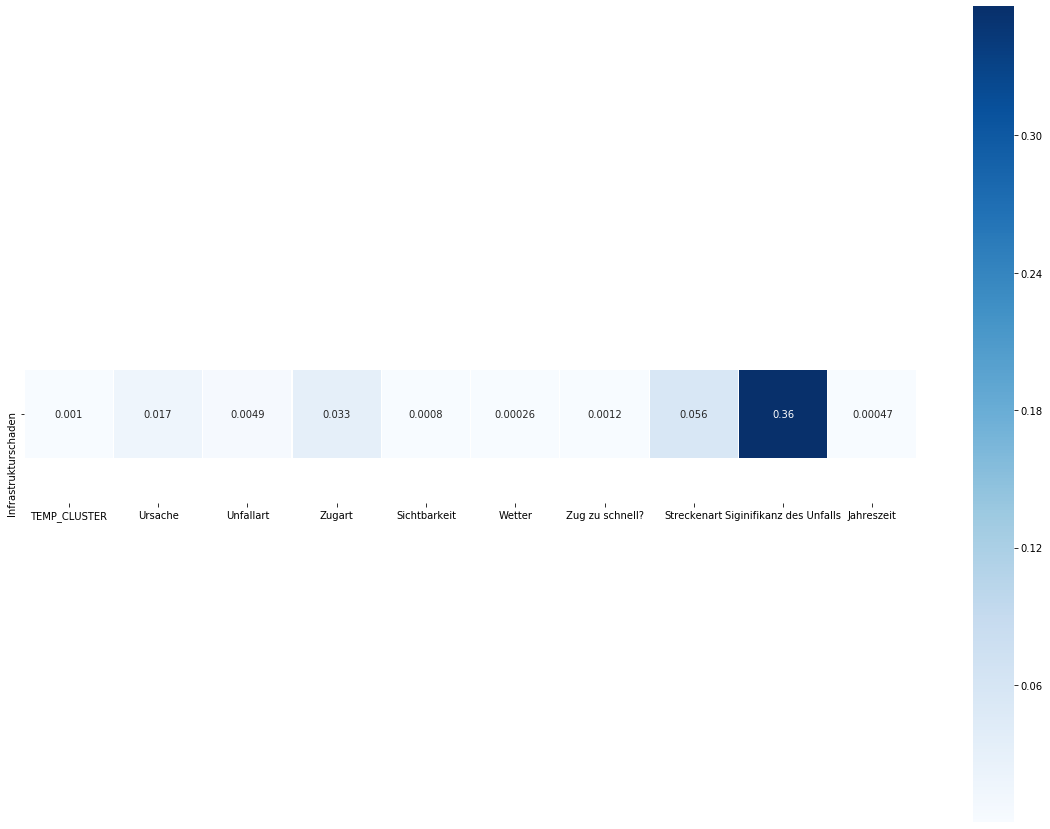

In [86]:
colormap = plt.cm.Blues
ax=plt.figure(figsize=(20,15)).gca()
x_axis_labels = ["TEMP_CLUSTER", "Ursache","Unfallart", "Zugart", "Sichtbarkeit", "Wetter", "Zug zu schnell?", "Streckenart", "Siginifikanz des Unfalls", "Jahreszeit"] # labels for x-axis
y_axis_labels = ["Infrastrukturschaden"] # labels for y-axis
ax=sns.heatmap(compare_anova,ax=ax,linewidths=0.1, 
            square=True, cmap=colormap, linecolor='white', annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)